## VAST Pilot Planet Hunting

This notebook gives an example of how to use vast-tools in a notebook environment to find planets in a VAST Pipeline run or the VAST Pilot Survey.

Planet searching does not have to be done separately and can be included in any query, but is done separate for the purposes of this example. Keep in mind that not all planets are visible in the VAST images even if they are in the field, search for Emil's posts in Slack for more information.

## VAST Pipeline Planet Hunting

Checking for planets in a pipeline run can be useful to compare against potential transient candidates. 

A pipeline run can be checked for planets by following the following process.

Firstly the Pipeline instance is imported along with some astropy components that will be used in the notebook.

In [1]:
from astropy.coordinates import SkyCoord, Angle
import astropy.units as u

from vasttools.pipeline import Pipeline

And the pipeline run is loaded, in this example the pilot survey epochs 0 - 13 is loaded. Please refer to the pipeline example notebook for more information on using the pipeline component.

In [2]:
pipe = Pipeline()
pilot_survey = pipe.load_run('tiles_corrected')

/opt/conda/lib/python3.8/site-packages/vasttools/pipeline.py:317: UserWarning: Measurements have been loaded with vaex.
  warnings.warn("Measurements have been loaded with vaex.")


Now, with the pipeline loaded, the method to use is `check_for_planets`. This function will take all the observations in the pipeline run and calculate whether a planet is present in the image footprint. A dataframe is returned that contains the information of the planets that are found to be present at the time of the observation. If no planets are found then the dataframe will be empty.

In [3]:
planets = pilot_survey.check_for_planets()
planets # to show the result

image_id                          DATEOBS   centre-ra  \
planet                                                                 
Mars    3630       1312 2019-10-29 22:14:38.930000+00:00  195.514815   
        3631       1312 2019-10-30 00:21:43.140000+00:00  195.514815   
        11904      1903 2020-06-19 20:52:32.800000+00:00  356.896421   
        11905      1903 2020-06-19 21:04:39.389000+00:00  356.896421   
Neptune 1090       1130 2019-04-28 23:24:02.498000+00:00  350.688100   
        1091       1130 2019-04-28 23:39:28.153040+00:00  350.688100   
        2378       1222 2019-08-27 19:04:37.006000+00:00  350.690032   
        2379       1222 2019-08-28 01:14:52.706000+00:00  350.690032   
        4226       1354 2019-10-30 11:39:02.385000+00:00  344.481619   
        4227       1354 2019-10-30 17:54:46.585000+00:00  344.481619   
        4240       1355 2019-10-30 10:24:33.362000+00:00  350.690109   
        4241       1355 2019-10-30 16:40:17.562000+00:00  350.690109   
        4982       1408 2019-10-29 14:05:56.567000+00:00  344.481588   
        4983       1408 2019-10-29 20:11:13.667000+00:00  344.481588   
        4996       1409 2019-10-29 13:25:37.920000+00:00  350.689952   
        4997       1409 2019-10-29 19:30:55.020000+00:00  350.689952   
        6676       1529 2020-01-11 07:36:28.257000+00:00  344.481965   
        6677       1529 2020-01-11 07:48:34.846000+00:00  344.481965   
        6704       1531 2020-01-11 08:02:11.015000+00:00  350.690262   
        6705       1531 2020-01-11 08:14:17.604000+00:00  350.690262   
        7362       1578 2020-01-12 07:30:51.504000+00:00  344.482104   
        7363       1578 2020-01-12 07:42:58.093000+00:00  344.482104   
        7390       1580 2020-01-12 07:56:24.309000+00:00  350.690494   
        7391       1580 2020-01-12 08:08:30.898000+00:00  350.690494   
        8720       1675 2020-01-18 08:00:37.122000+00:00  350.690039   
        8721       1675 2020-01-18 08:12:43.711000+00:00  350.690039   
        9336       1719 2020-01-26 05:56:11.831000+00:00  344.481827   
        9337       1719 2020-01-26 06:08:18.420000+00:00  344.481827   
        10288      1787 2020-01-19 07:56:27.627000+00:00  350.690081   
        10289      1787 2020-01-19 08:08:34.216000+00:00  350.690081   
        10904      1831 2020-01-27 05:52:17.376000+00:00  344.481857   
        10905      1831 2020-01-27 06:04:14.012000+00:00  344.481857   
        11968      1907        2020-06-19 21:48:37+00:00  350.692436   
        11969      1907 2020-06-19 22:00:33.636000+00:00  350.692436   
        14124      2061 2020-08-29 15:55:35.907000+00:00  350.689873   
        14125      2061 2020-08-29 16:07:42.496000+00:00  350.689873   
Venus   520        1090 2019-04-26 00:22:57.903000+00:00    9.308960   
        521        1090 2019-04-26 00:38:23.558040+00:00    9.308960   
        9326       1719 2020-01-26 05:56:11.831000+00:00  344.481827   
        9327       1719 2020-01-26 06:08:18.420000+00:00  344.481827   
        10894      1831 2020-01-27 05:52:17.376000+00:00  344.481857   
        10895      1831 2020-01-27 06:04:14.012000+00:00  344.481857   
Jupiter 6          1053 2019-11-08 03:17:46.448000+00:00  264.907423   
        7          1053 2019-11-08 03:35:11.542400+00:00  264.907423   
        3898       1331 2019-10-30 12:16:21.873000+00:00  264.905719   
        3899       1331 2019-10-30 18:32:06.073000+00:00  264.905719   
        4682       1387 2019-10-29 12:34:02.450000+00:00  264.906065   
        4683       1387 2019-10-29 18:39:19.550000+00:00  264.906065   
Mercury 518        1090 2019-04-26 00:22:57.903000+00:00    9.308960   
        519        1090 2019-04-26 00:38:23.558040+00:00    9.308960   
        588        1095 2019-04-26 23:43:43.068000+00:00   15.515860   
        589        1095 2019-04-26 23:59:08.723040+00:00   15.515860   
Moon    16790      1331 2019-10-31 19:35:02.873000+00:00  264.905719   
        16804      1332 2019-10-31 19:47:19.416000+00:0

Now that we know the coordinates of the planets we can check if any sources were detected at these locations using the pipeline sources.

In [4]:
# create a skycoord from the planet results.
planet_skycoord = SkyCoord(planets['ra'], planets['dec'], unit=(u.deg, u.deg))

# we use the pilot_survey.sources_skycoord to do the matching.
idx, d2d, _ = planet_skycoord.match_to_catalog_sky(pilot_survey.sources_skycoord)

# obtain matches less than 20 arcsec
mask = d2d < 20 * u.arcsec

# show the planets with a source match
planets[mask]

image_id                          DATEOBS   centre-ra  \
planet                                                                 
Mars    11904      1903 2020-06-19 20:52:32.800000+00:00  356.896421   
        11905      1903 2020-06-19 21:04:39.389000+00:00  356.896421   
Neptune 10288      1787 2020-01-19 07:56:27.627000+00:00  350.690081   
        10289      1787 2020-01-19 08:08:34.216000+00:00  350.690081   
        10904      1831 2020-01-27 05:52:17.376000+00:00  344.481857   
        10905      1831 2020-01-27 06:04:14.012000+00:00  344.481857   
Venus   9327       1719 2020-01-26 06:08:18.420000+00:00  344.481827   
        10895      1831 2020-01-27 06:04:14.012000+00:00  344.481857   
Jupiter 6          1053 2019-11-08 03:17:46.448000+00:00  264.907423   
        7          1053 2019-11-08 03:35:11.542400+00:00  264.907423   
        3898       1331 2019-10-30 12:16:21.873000+00:00  264.905719   
        4682       1387 2019-10-29 12:34:02.450000+00:00  264.906065   

               centre-dec   planet          ra        dec       sep  
planet                                                               
Mars    11904   -6.300463     Mars  356.221997  -4.745420  1.693326  
        11905   -6.300463     Mars  356.226822  -4.743518  1.693176  
Neptune 10288   -6.299412  Neptune  347.905030  -6.297445  2.765019  
        10289   -6.299412  Neptune  347.905240  -6.297353  2.764810  
        10904   -6.299388  Neptune  348.118195  -6.205733  3.620135  
        10905   -6.299388  Neptune  348.118427  -6.205633  3.620368  
Venus   9327    -6.299450    Venus  346.437298  -7.061256  2.089451  
        10895   -6.299388    Venus  347.528115  -6.556151  3.041987  
Jupiter 6      -25.136968  Jupiter  263.999350 -23.142368  2.158103  
        7      -25.136968  Jupiter  264.001974 -23.142501  2.157069  
        3898   -25.136259  Jupiter  262.168108 -23.044683  3.255785  
        4682   -25.136452  Jupiter  261.965491 -23.032427  3.407670

Now lets fetch the sources that the above planet positions are matched to:

In [5]:
# get the sources that have a planet match, using the masked idx from the crossmatch.
planet_matches = pilot_survey.sources.iloc[idx[mask]].copy()

# Assign the planet name to a column
planet_matches['planet'] = planets[mask]['planet'].to_numpy()

planet_matches

,wavg_ra,wavg_dec,avg_compactness,min_snr,max_snr,wavg_uncertainty_ew,wavg_uncertainty_ns,avg_flux_int,avg_flux_peak,max_flux_peak,...,vs_abs_significant_max_peak,m_abs_significant_max_peak,vs_abs_significant_max_int,m_abs_significant_max_int,n_measurements,n_selavy,n_forced,n_siblings,n_relations,planet
id,,,,,,,,,,,,,,,,,,,,,
3472985,356.225175,-4.743821,1.575065,23.025863,23.025863,0.000089,0.000089,0.745015,0.437815,5.342,...,17.141817,2.356920,14.009359,2.219457,10,1,9,0,0,Mars
3472985,356.225175,-4.743821,1.575065,23.025863,23.025863,0.000089,0.000089,0.745015,0.437815,5.342,...,17.141817,2.356920,14.009359,2.219457,10,1,9,0,0,Mars
3264633,347.906767,-6.296052,2.039933,5.071730,5.071730,0.000092,0.000092,0.389541,0.264541,1.202,...,0.000000,0.000000,0.000000,0.000000,10,1,9,0,0,Neptune
3264633,347.906767,-6.296052,2.039933,5.071730,5.071730,0.000092,0.000092,0.389541,0.264541,1.202,...,0.000000,0.000000,0.000000,0.000000,10,1,9,0,0,Neptune
3458648,348.116163,-6.209303,1.129736,5.333333,8.411522,0.000145,0.000145,1.918300,1.725500,2.044,...,0.000000,0.000000,0.000000,0.000000,10,10,0,0,0,Neptune
3458648,348.116163,-6.209303,1.129736,5.333333,8.411522,0.000145,0.000145,1.918300,1.725500,2.044,...,0.000000,0.000000,0.000000,0.000000,10,10,0,0,0,Neptune
3677191,346.436601,-7.061600,3.517856,77.146939,77.146939,0.000093,0.000093,7.421009,2.133232,18.901,...,55.933098,2.145456,60.352640,2.040299,9,1,8,0,0,Venus
3333935,347.527618,-6.556441,3.927096,56.197324,56.197324,0.000088,0.000088,6.679677,1.761277,16.803,...,39.777595,2.046729,45.547531,2.011797,10,1,9,0,0,Venus
3361168,264.000401,-23.144009,4.690026,168.218638,168.218638,0.000098,0.000098,55.034561,11.738561,93.866,...,149.779440,2.008703,143.639537,2.001852,8,1,7,1,0,Jupiter


So this list above would be a list to check against potential transient sources, as it's likely they are a planet!

Remember that in the pipeline a planet is only likely to have one detection per source as the pipeline does not track a planet's position by itself.
Using a Query from vast tools will give a more complete picture for the pilot survey (see the next section). But by combing the sources that we know are planets a lightcurve could be constructed.

Using the source ids above it is now possible to fetch them and see what they look like.

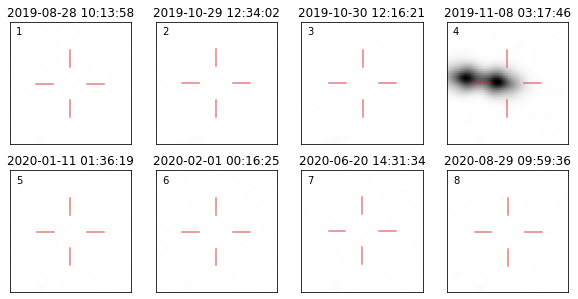

In [6]:
jupiter = pilot_survey.get_source(3361168)
jupiter.show_all_png_cutouts(size=3*u.arcmin, force=True, no_selavy=True)

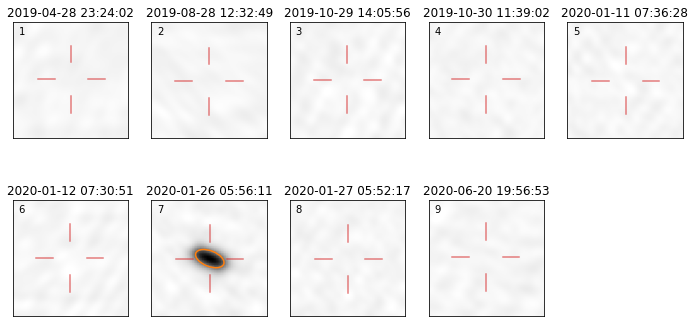

In [7]:
venus = pilot_survey.get_source(3677191)
venus.show_all_png_cutouts(columns=5, force=True, size=2*u.arcmin, figsize=(12,6))

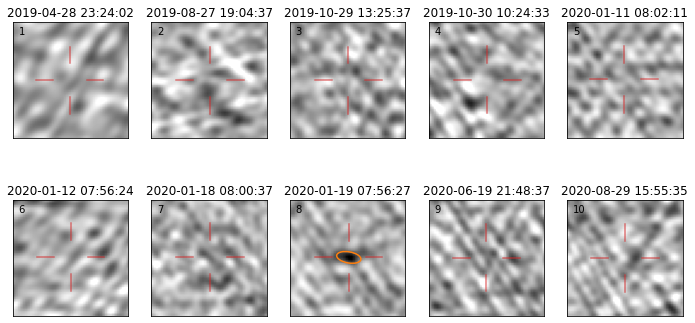

In [8]:
neptune = pilot_survey.get_source(3264633)
neptune.show_all_png_cutouts(columns=5, force=True, size=2*u.arcmin, figsize=(12,6))

## VAST Tools Query Planet Hunting

If you want to build up a complete picture of a planet in the VAST Survey it can be more useful to use a Query in VAST Tools. This will track the planet across a single source so you can easily build a lightcurve or postage stamps.

Below are the imports required for the Query example. The main import required from vast-tools is the Query class.

In [9]:
from vasttools.query import Query
import matplotlib.pyplot as plt

In this example we will search for Jupiter and Venus. We will also check for the Moon, and if you have RACS available this will be found.

Planet searching is done through the normal query method as below. It's recommened to use the `TILE` images for planet searching.

The allowed 'planets' are all the solar system planets, in addition to `pluto`, `moon` and `sun`.

In [10]:
planets_query = Query(
    epochs="all", 
    planets=['jupiter', 'venus', 'moon'],
    crossmatch_radius=10.,
    base_folder='/data/vast-survey/pilot/',
    use_tiles=True
)

RACS data selected!
Remember RACS data supplied by VAST is not final and results may vary.
RMS measurements are not supported with tiles!
Turning RMS measurements off.


Find the fields first.

In [11]:
planets_query.find_fields()

Looking at the fields_df below we see the fields for which Jupiter and Venus appear in. If you have RACS you'll also see the Moon. We'll go ahead and run `find_sources()`.

In [12]:
planets_query.fields_df

,epoch,field,sbid,dateobs,name,ra,dec,stokes,primary_field,skycoord,fields,planet
0,0,RACS_1739-25A,8576,2019-04-25 18:59:12.768,Jupiter,263.206678,-22.656523,I,RACS_1739-25A,"<SkyCoord (ICRS): (ra, dec) in deg\n (263.2...",[RACS_1739-25A],True
1,0,RACS_1727-18A,8584,2019-04-27 15:06:13.248,Jupiter,263.109242,-22.652624,I,RACS_1727-18A,"<SkyCoord (ICRS): (ra, dec) in deg\n (263.1...",[RACS_1727-18A],True
3,3x,VAST_1739-25A,10335,2019-10-29 12:34:02.450,Jupiter,261.965491,-23.032427,I,VAST_1739-25A,"<SkyCoord (ICRS): (ra, dec) in deg\n (261.9...",[VAST_1739-25A],True
2,2,VAST_1739-25A,10342,2019-10-30 12:16:21.873,Jupiter,262.168108,-23.044683,I,VAST_1739-25A,"<SkyCoord (ICRS): (ra, dec) in deg\n (262.1...",[VAST_1739-25A],True
4,0,RACS_1938-18A,8576,2019-04-25 21:49:24.816,Moon,295.819774,-21.540880,I,RACS_1938-18A,"<SkyCoord (ICRS): (ra, dec) in deg\n (295.8...",[RACS_1938-18A],True
5,0,RACS_0216+06A,8641,2019-05-04 00:01:08.342,Moon,31.944223,7.919765,I,RACS_0216+06A,"<SkyCoord (ICRS): (ra, dec) in deg\n (31.94...",[RACS_0216+06A],True
6,0,RACS_0037+00A,8578,2019-04-26 03:27:35.942,Venus,6.476223,1.047361,I,RACS_0037+00A,"<SkyCoord (ICRS): (ra, dec) in deg\n (6.476...",[RACS_0037+00A],True
7,8,VAST_2257-06A,11600,2020-01-26 05:56:11.831,Venus,346.428181,-7.065501,I,VAST_2257-06A,"<SkyCoord (ICRS): (ra, dec) in deg\n (346.4...",[VAST_2257-06A],True
8,9,VAST_2257-06A,11631,2020-01-27 05:52:17.376,Venus,347.519155,-6.560360,I,VAST_2257-06A,"<SkyCoord (ICRS): (ra, dec) in deg\n (347.5...",[VAST_2257-06A],True


In [13]:
planets_query.find_sources()
planets_query.results

name
Jupiter    <vasttools.source.Source object at 0x7f936c84f...
Moon       <vasttools.source.Source object at 0x7f937e76e...
Venus      <vasttools.source.Source object at 0x7f936c863...
Name: name, dtype: object

With the results in hand we can now take a look at the results:

In [14]:
jupiter = planets_query.results['Jupiter']
venus = planets_query.results['Venus']
moon = planets_query.results['Moon']

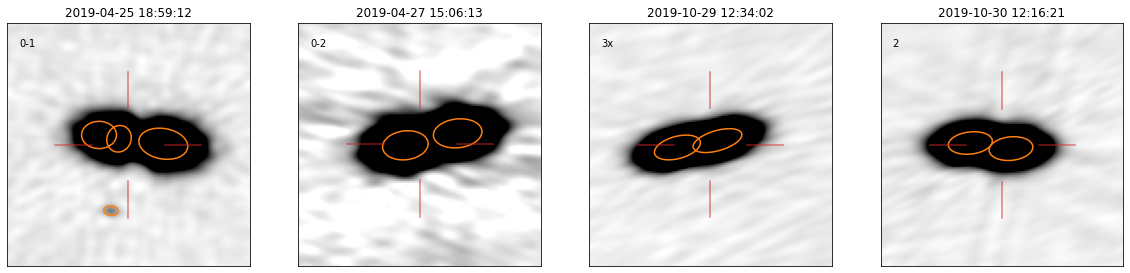

In [15]:
jupiter.show_all_png_cutouts(figsize=(20,8), zscale=True, contrast=0.1, force=True)

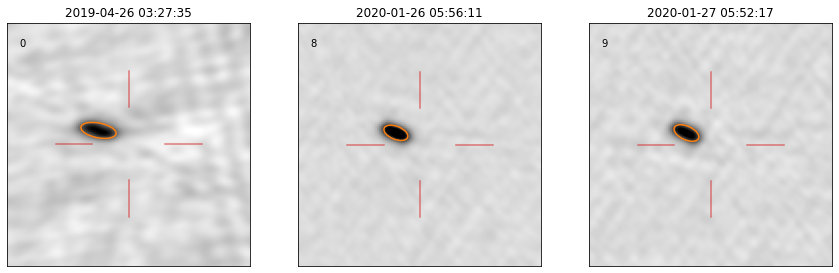

In [16]:
venus.show_all_png_cutouts(figsize=(20,8))

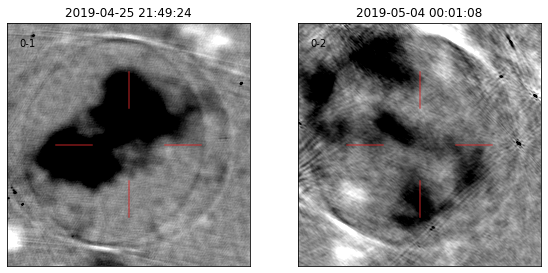

In [17]:
moon.show_all_png_cutouts(figsize=(20,8), size=Angle(35. * u.arcmin), zscale=True, contrast=0.4, no_selavy=True)